In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
dados = pd.read_csv(r'estonia_acident.csv')

In [15]:
dados.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [16]:
print('Colunas',dados.shape[1])
print('Linhas',dados.shape[0])
print('Dados Unicos \n',dados.nunique())

Colunas 8
Linhas 989
Dados Unicos 
 PassengerId    987
Country         16
Firstname      849
Lastname       774
Sex              2
Age             78
Category         2
Survived         2
dtype: int64


In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
PassengerId    989 non-null int64
Country        989 non-null object
Firstname      989 non-null object
Lastname       989 non-null object
Sex            989 non-null object
Age            989 non-null int64
Category       989 non-null object
Survived       989 non-null int64
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [18]:
dados.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


In [19]:
print('Possui Dados Nulos ?', dados.isnull().any().any())

Possui Dados Nulos ? False


Text(0.5, 0, 'Sobrevivente')

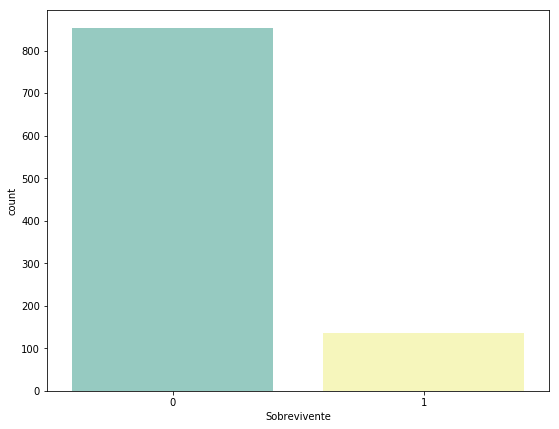

In [20]:
plt.figure(figsize = (9,7))
sns.countplot('Survived',data = dados, palette = 'Set3')
plt.xlabel('Sobrevivente')

In [41]:
print('Porcentagem de Sobreviventes',round(dados['Survived'].value_counts()[1] / len(dados['Survived']),2) * 100,'%') 
print('Porcentagem de Mortos',round(dados['Survived'].value_counts()[0] / len(dados['Survived']),2) * 100,'%')

Porcentagem de Sobreviventes 14.000000000000002 %
Porcentagem de Mortos 86.0 %


In [50]:
dados['PassengerId'].duplicated().sum().sum()

2

In [54]:
dados.drop(['PassengerId','Firstname','Lastname'],axis = 1,inplace = True)

In [55]:
dados.head()

,Country,Sex,Age,Category,Survived
0,Sweden,M,62,P,0
1,Estonia,F,22,C,0
2,Estonia,F,21,C,0
3,Sweden,M,53,C,0
4,Sweden,F,55,P,0


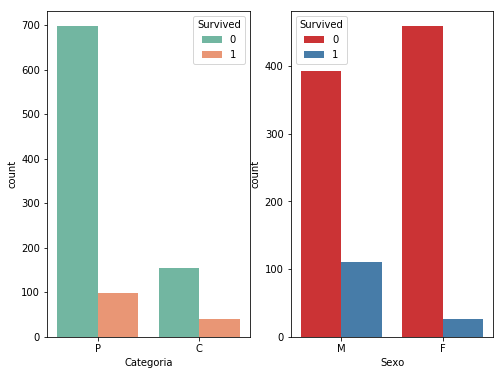

In [65]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (8,6))

sns.countplot('Category',data = dados, ax = ax1, hue = 'Survived',palette = 'Set2')
ax1.set_xlabel('Categoria')

sns.countplot('Sex',data = dados, ax = ax2, hue = 'Survived',palette = 'Set1')
ax2.set_xlabel('Sexo')


plt.show()

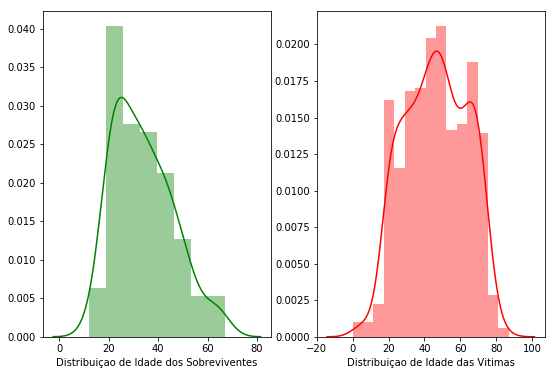

In [75]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (9,6))

survived = dados.loc[dados['Survived'] == 1,'Age']
no_survived = dados.loc[dados['Survived'] == 0,'Age']


sns.distplot(survived, ax = ax1, color = 'g')
ax1.set_xlabel('Distribuiçao de Idade dos Sobreviventes', size = 10)

sns.distplot(no_survived, ax = ax2, color = 'r')
ax2.set_xlabel('Distribuiçao de Idade das Vitimas', size = 10)

plt.show()

In [80]:
dados.groupby('Country')['Survived'].count()

Country
Belarus            1
Canada             1
Denmark            6
Estonia          344
Finland           16
France             1
Germany            8
Great Britain      2
Latvia            28
Lithuania          4
Morocco            2
Netherlands        2
Nigeria            1
Norway             9
Russia            14
Sweden           550
Name: Survived, dtype: int64

In [83]:
dados.head()

,Country,Sex,Age,Category,Survived
0,Sweden,M,62,P,0
1,Estonia,F,22,C,0
2,Estonia,F,21,C,0
3,Sweden,M,53,C,0
4,Sweden,F,55,P,0


In [82]:
from sklearn.preprocessing import LabelEncoder

In [86]:
labelencoder = LabelEncoder()

dados['Sex'] = labelencoder.fit_transform(dados['Sex'])
dados['Category'] = labelencoder.fit_transform(dados['Category'])

dados.head()



,Country,Sex,Age,Category,Survived
0,Sweden,1,62,1,0
1,Estonia,0,22,0,0
2,Estonia,0,21,0,0
3,Sweden,1,53,0,0
4,Sweden,0,55,1,0


In [87]:
dados.corr().round(2)

,Sex,Age,Category,Survived
Sex,1.00,-0.05,0.07,0.24
Age,-0.05,1.00,0.33,-0.25
Category,0.07,0.33,1.00,-0.09
Survived,0.24,-0.25,-0.09,1.00


In [101]:
from sklearn.feature_selection import SelectKBest, chi2

x = dados[['Sex','Age','Category']]
y = dados['Survived']

sel = SelectKBest(chi2, k =3)
sel.fit(x,y)

sel.scores_



array([ 27.08696658, 397.89693649,   1.5836105 ])

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [129]:

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 101,test_size = 0.2)

ln = LogisticRegression()
ln.fit(x_train,y_train)

print('Score do modelo no treino ',round(ln.score(x_train,y_train),2)* 100,'%')

y_pred = ln.predict(x_test)

print(round(ln.score(x_test,y_test),2) * 100)

print('Medida Acurácia do Modelo',round(accuracy_score(y_pred,y_test),2) * 100, '%')



Score do modelo no treino  85.0 %
86.0
Medida Acurácia do Modelo 86.0 %


In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       173
           1       0.00      0.00      0.00        25

   micro avg       0.86      0.86      0.86       198
   macro avg       0.44      0.49      0.46       198
weighted avg       0.76      0.86      0.81       198

